## NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE - 2 

## <center> LIBRARY IMPORT </center>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## <center> DATA PREPEARATION </center>

In [6]:
# Mendeklarasikan file datasets ke dalam sebuah variable
data = 'EconomiesOfScale.csv'

# Membaca datasets
data_economics = pd.read_csv('EconomiesOfScale.csv')

# Menampilkan 5 data pertama pada datasets
print(data_economics.head()) 

# Menampilkan 5 data pertama dan 5 data terakhirpada datasets
data_economics 

# Memberikan informasi jumlah, column, type data dsb pada datasets
data_economics.info()

# Memberikan informasi matematis seperti min, max, mean dsb pada datasets
data_economics.describe()

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


## <center> DATA VISUALIZATION </center>

#### - LINEAR REGGRESION

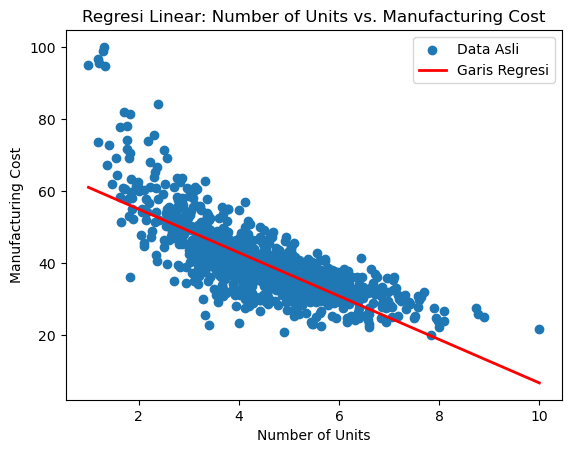

Koefisien Regresi (Slope): -6.033368302984275
Intersep (Intercept): 67.03904193389238


In [7]:
# Mendefinisikan kolom label dan target. x  sebagai label dan y sebagai target
X = data_economics[['Number of Units']]
y = data_economics['Manufacturing Cost']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Membuat prediksi
y_pred = model.predict(X)

# Membuat plot data asli dan garis regresi
plt.scatter(X, y, label='Data Asli')
plt.plot(X, y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.title('Regresi Linear: Number of Units vs. Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.show()

# Menampilkan koefisien regresi dan intersep
print(f'Koefisien Regresi (Slope): {model.coef_[0]}')
print(f'Intersep (Intercept): {model.intercept_}')

#### - POLYNOMIAL REGGRESION

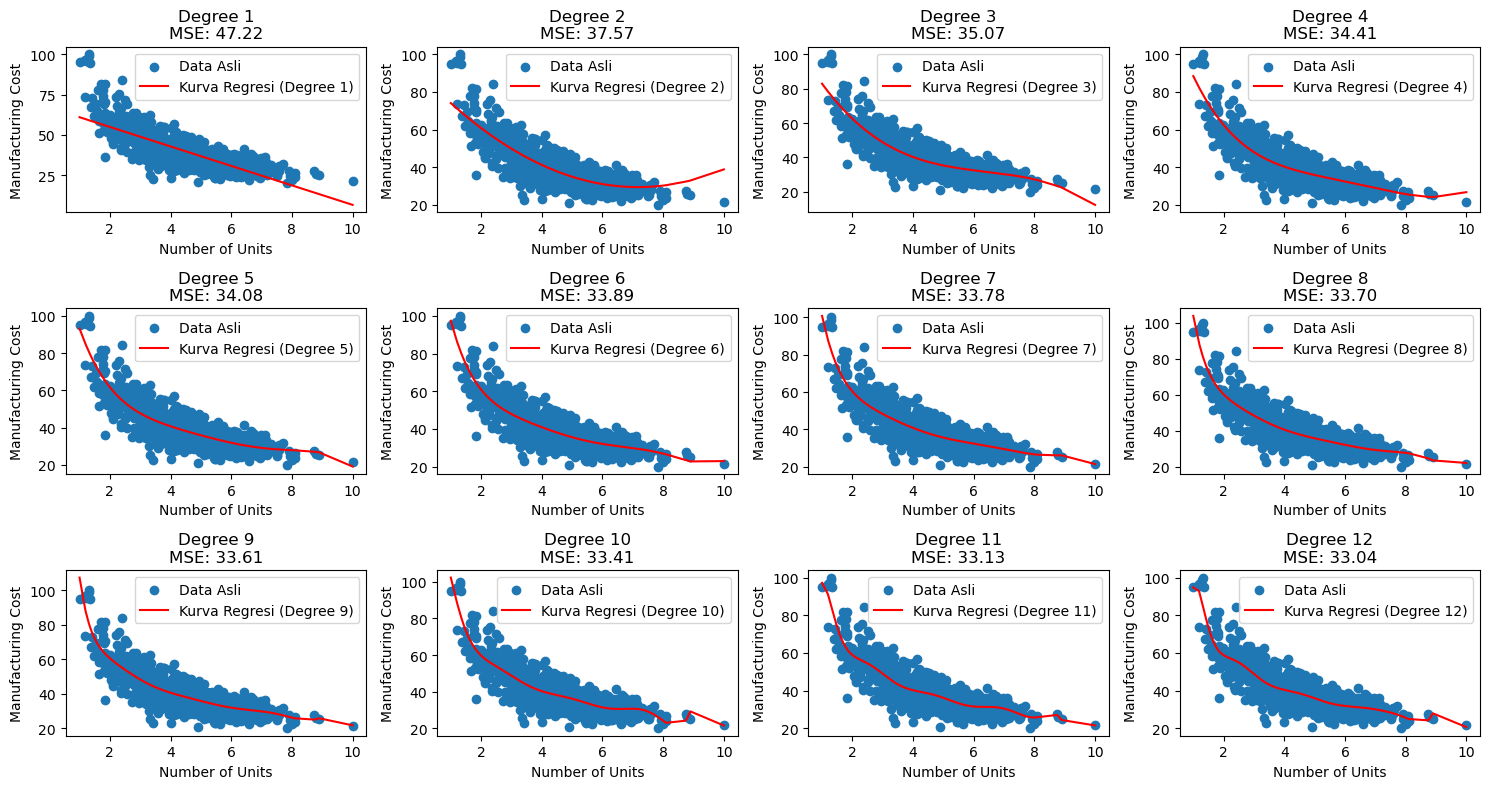

Degree 1: MSE = 47.22
Degree 2: MSE = 37.57
Degree 3: MSE = 35.07
Degree 4: MSE = 34.41
Degree 5: MSE = 34.08
Degree 6: MSE = 33.89
Degree 7: MSE = 33.78
Degree 8: MSE = 33.70
Degree 9: MSE = 33.61
Degree 10: MSE = 33.41
Degree 11: MSE = 33.13
Degree 12: MSE = 33.04


In [8]:
# Derajat yang ingin diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
mse_values = []

# Membuat subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 8))
fig.tight_layout(pad=3.0)

for i, degree in enumerate(degrees):
    # Mengubah fitur X menjadi matriks polinomial dengan derajat tertentu
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model regresi linear dengan fitur polinomial
    model = LinearRegression()
    model.fit(X_poly, y)

    # Membuat prediksi
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Menampilkan plot data asli dan kurva regresi
    ax = axes[i // 4, i % 4]
    ax.scatter(X, y, label='Data Asli')
    ax.plot(X, y_pred, color='red', label='Kurva Regresi (Degree {})'.format(degree))
    ax.set_title('Regresi Polynomial: Degree {}'.format(degree))
    ax.set_title(f'Degree {degree}\nMSE: {mse:.2f}')
    ax.set_xlabel('Number of Units')
    ax.set_ylabel('Manufacturing Cost')
    ax.legend()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')